In [1]:
%load_ext autoreload
%autoreload 2
import extract_environment as ee
import time
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import os
import xarray as xr
import dask
from dask.distributed import Client


In [2]:
dir_env = '/home/kbrennan/phd/data/climate/present'
dir_track = '/home/kbrennan/phd/data/climate/tracks/present'
day = '20210628'

now = pd.to_datetime(day+'19', format='%Y%m%d%H')

In [3]:
cells = ee.load_cells(dir_track, day)

In [4]:
cell = cells[83]

In [5]:
env = ee.load_environments(dir_env, now)

In [6]:
cookie = ee.cutout_cookie(cell, env, now)
cookie

<xarray.Dataset>
Dimensions:    (x: 51, y: 51, pressure: 8)
Coordinates:
  * x          (x) float64 -55.0 -52.8 -50.6 -48.4 -46.2 ... 48.4 50.6 52.8 55.0
  * y          (y) float64 -55.0 -52.8 -50.6 -48.4 -46.2 ... 48.4 50.6 52.8 55.0
    time       datetime64[ns] 2021-06-28T19:00:00
  * pressure   (pressure) float32 200.0 300.0 400.0 500.0 ... 700.0 850.0 925.0
Data variables: (12/59)
    U_10M      (y, x) float32 ...
    V_10M      (y, x) float32 ...
    VMAX_10M   (y, x) float32 ...
    T_2M       (y, x) float32 ...
    TD_2M      (y, x) float32 ...
    RELHUM_2M  (y, x) float32 ...
    ...         ...
    TOT_SNOW   (y, x) float32 dask.array<chunksize=(51, 51), meta=np.ndarray>
    DHAIL_MX   (y, x) float32 dask.array<chunksize=(51, 51), meta=np.ndarray>
    rlat       (y) float32 -0.98 -0.96 -0.94 -0.92 ... -0.02 1.118e-08 0.02
    rlon       (x) float32 -2.66 -2.64 -2.62 -2.6 ... -1.72 -1.7 -1.68 -1.66
    lat        (y, x) float32 45.96 45.96 45.96 45.96 ... 46.99 46.99 46.99
    lon        (y, x) float32 6.173 6.202 6.23 6.259 ... 7.478 7.507 7.537 7.566
Attributes:
    title:           COSMO driven by ERA5
    source:          COSMO_5.08
    Conventions:     CF-1.4
    conventionsURL:  http://www.cfconventions.org/
    creation_date:   2023-09-29 12:37:13

In [7]:
u_storm = np.nanmean(cell["delta_y"][1::])
v_storm = np.nanmean(cell["delta_x"][1::])

In [8]:
cookie = ee.add_secondary_variables(cookie)
cookie

<xarray.Dataset>
Dimensions:     (pressure: 8, x: 51, y: 51)
Coordinates:
  * pressure    (pressure) float32 200.0 300.0 400.0 500.0 ... 700.0 850.0 925.0
  * x           (x) float64 -55.0 -52.8 -50.6 -48.4 ... 48.4 50.6 52.8 55.0
  * y           (y) float64 -55.0 -52.8 -50.6 -48.4 ... 48.4 50.6 52.8 55.0
    time        datetime64[ns] 2021-06-28T19:00:00
Data variables: (12/67)
    U_10M       (y, x) float32 1.068 1.325 2.461 ... 0.05968 -0.8192 -1.662
    V_10M       (y, x) float32 0.698 0.4855 -0.1347 ... 0.7165 0.5539 0.6513
    VMAX_10M    (y, x) float32 10.28 10.96 13.94 13.15 ... 6.226 6.339 5.71
    T_2M        (y, x) float32 289.2 287.9 286.1 285.0 ... 290.7 290.4 290.2
    TD_2M       (y, x) float32 287.1 286.5 285.6 284.6 ... 288.8 288.6 288.4
    RELHUM_2M   (y, x) float32 87.72 91.31 96.9 97.61 ... 87.4 88.7 89.38 89.11
    ...          ...
    THETA       (pressure, y, x) float32 345.5 345.1 345.0 ... 297.2 297.1 296.7
    THETA_2M    (y, x) float32 294.4 294.8 295.4 296.8 ... 295.8 296.1 296.3
    THETA_E     (pressure, y, x) float32 345.6 345.2 345.1 ... 328.9 329.0 330.1
    THETA_E_2M  (y, x) float32 325.4 325.3 325.1 325.6 ... 330.5 330.5 330.5
    VORT        (pressure, y, x) float64 0.09486 0.02592 ... 0.2068 0.8389
    DIV         (pressure, y, x) float64 0.544 0.4868 0.4642 ... -0.3649 1.172
Attributes:
    title:           COSMO driven by ERA5
    source:          COSMO_5.08
    Conventions:     CF-1.4
    conventionsURL:  http://www.cfconventions.org/
    creation_date:   2023-09-29 12:37:13

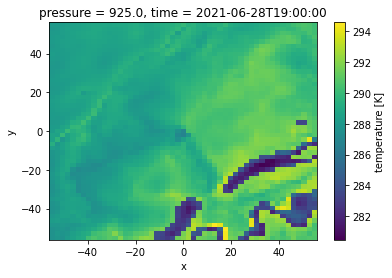

In [9]:
cookie.T.sel(pressure=925).plot()

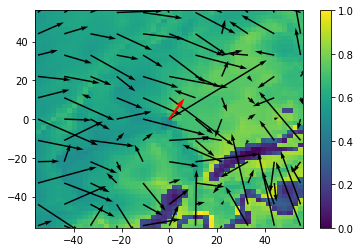

In [10]:
pressure = 925
plt.pcolormesh(cookie.x,cookie.y,cookie.T.sel(pressure=pressure))
stride= 5
plt.quiver(cookie.x[::stride],cookie.y[::stride],cookie.U.sel(pressure=pressure)[::stride,::stride],cookie.V.sel(pressure=pressure)[::stride,::stride], scale=30)
plt.quiver(0,0,u_storm,v_storm, scale=30, color='r')
plt.colorbar()

In [11]:
r_cookie = ee.rotate_cookie(cookie,cell)

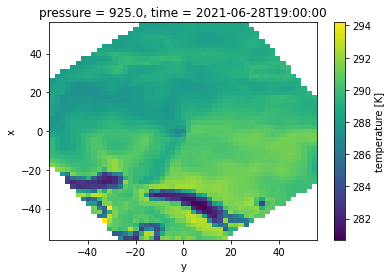

In [12]:
r_cookie.T.sel(pressure=925).plot()

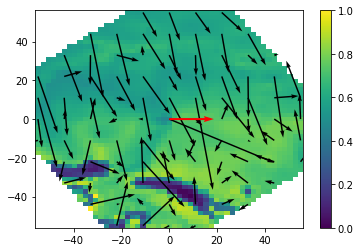

In [13]:
pressure = 925
plt.pcolormesh(r_cookie.x,r_cookie.y,r_cookie.T.sel(pressure= pressure))
stride= 5
plt.quiver(cookie.x[::stride],r_cookie.y[::stride],r_cookie.U.sel(pressure=pressure)[::stride,::stride],r_cookie.V.sel(pressure=pressure)[::stride,::stride], scale=30)
plt.quiver(0,0,5,0, scale=30, color='r')
plt.colorbar()

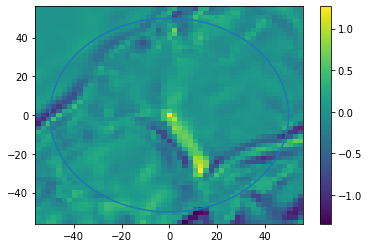

In [14]:
plt.pcolormesh(cookie.x,cookie.y,cookie.W.sel(pressure=925).squeeze())
# plot circle
circle = plt.plot(np.sin(np.linspace(0,2*np.pi,100))*50,np.cos(np.linspace(0,2*np.pi,100))*50)
plt.colorbar()